In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
data= pd.read_csv('hard_drive_damages_january_2016.csv')
data['date']= pd.to_datetime(data['date'],errors='coerce')  # to prevent errors in the date reading
data.head(5)

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_224_normalized,smart_224_raw
0,0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,100.0,0.0,100.0,0.0,97.0,27929.0,253.0,20.0,100.0,0.0,NaN,NaN
1,1,2016-01-01,Z305B2QN,ST4000DM000,4000787030016,0,113.0,54551400.0,100.0,0.0,100.0,411.0,30.0,30.0,100.0,0.0,NaN,NaN
2,2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,100.0,0.0,100.0,0.0,97.0,27492.0,250.0,24.0,100.0,0.0,NaN,NaN
3,3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,100.0,0.0,100.0,0.0,97.0,26640.0,193.0,31.0,100.0,0.0,NaN,NaN
4,4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,3000592982016,0,200.0,0.0,200.0,0.0,84.0,12198.0,121.0,29.0,200.0,0.0,NaN,NaN


In [4]:

#### which of these variables seem to be important?

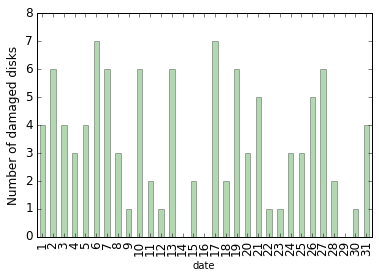

In [57]:
#### what is the number of damaged disks as a function of the days?
### failure=0 OK, 1= not working anymore
c= data.groupby([data.date.dt.day, data.failure]).size()
d= c.unstack('failure').fillna(0)
ax= d[1].plot(kind='bar', color= 'green', ylim=(0,8), fontsize=12, alpha=0.3)
ax.set_ylabel('Number of damaged disks', fontsize= 12)

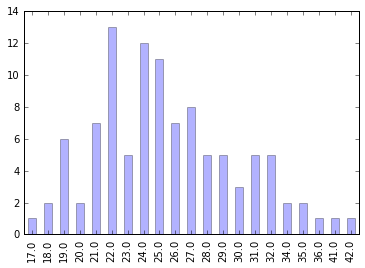

In [71]:
#### What is the number of damaged disks as a function of the temperature?
c= data[data.failure==1]
ax= c.smart_194_raw.value_counts().sort_index().plot(kind='bar', alpha= 0.3)
## Does it have sense? Maybe I should do an interpolation between values to see better trend. 
## Am I using the correct set of values (raw data).

In [74]:
#### After one month, how many disks still work (as a function of the model)? 

In [81]:
c= data[(data.date.dt.day==31) & (data.failure== 0)]
c.model.value_counts().sort_index()

HGST HDS5C4040ALE630          67
HGST HDS724040ALE640          40
HGST HMS5C4040ALE640        7080
HGST HMS5C4040BLE640        3091
HGST HUH728080ALE600          45
Hitachi HDS5C3030ALA630     4558
Hitachi HDS5C3030BLE630        1
Hitachi HDS5C4040ALE630     2636
Hitachi HDS722020ALA330     4491
Hitachi HDS723020BLA642        8
Hitachi HDS723030ALA640     1000
Hitachi HDS723030BLE640        9
Hitachi HDS724040ALE640        3
Hitachi HDT725025VLA380        1
ST2000VN000                    6
ST250LM004 HN                 29
ST250LT007                     4
ST31500541AS                  45
ST3160316AS                   52
ST3160318AS                   47
ST320LT007                    65
ST3500320AS                    1
ST4000DM000                29982
ST4000DX000                  212
ST500LM012 HN                539
ST6000DX000                 1882
ST9250315AS                   45
ST9320325AS                   22
TOSHIBA DT01ACA300            47
TOSHIBA MD04ABA400V          145
TOSHIBA MD